# HW 1 Report
### EE 399 Machine Learning for Science and Engineering

Completed by: Ewan Lister on 04/03/2023


## Abstract

Machine Learning often assumes the guise of a complex and mystical form of CS sorcery, but this is just isn't the case. This assignment seeks to simplify concepts of Machine Learning by presenting one of its key methods--**curve fitting**. From small to large systems, curve fitting entails creating a model, and then minimizing the error found between that model and the actual sampled data. In this assignment, we will give an in depth coverage of the theory behind curve fitting, demo some code for fitting sampled data, present results, and evaluate our methods and error. 

## Contents

This report will be 

Title/author/abstract Title, author/address lines, and short (100 words or less) abstract. 
Sec. I. Introduction and Overview
Sec. II. Theoretical Background
Sec. III. Algorithm Implementation and Development 
Sec. IV. Computational Results
Sec. V. Summary and Conclusions

## I. Introduction and Overview

Curve fitting is a ubiquitous tool used in virtually all fields of science and engineering. Typically, it seeks to find continuous approximations for data that is noisy, discrete, has a low sampling rate, or where the driving variables behind the data are unknown. By collecting data and then generating a curve fit, scientists and engineers can determine whether new models describe natural phenomena, diagnose error associated with measurement, and even overturn existing scientific models. Curve fitting does not do all the work for us, however. The technique has the caveat that we ourselves must propose a model for fitting. For example, by definition a linear fit would return a completely different function than a radical fit, meaning we would draw totally different conclusions from the data. Systems in nature do not uniformly act in terms of one elementary function. There is much variety, so we must select our idea of what the fit is, and then let the computer do the work.

We will begin by covering the theoretical background of curve fitting, discussing the data, model, metric, and fitting techniques. Then, we will develop an algorithm for fitting multiple different curves to a series of data. After plotting our results, we will discuss the fits made by the algorithm and the margin of error. Finally, we will conclude with a discussion of the implications this method had for the assignment and in general.


In [2]:
# import useful math and plotting libraries
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

## II. Theoretical Background

The fundamental unit of consideration in curve fitting is the **model**. A model can be thought of as some sort of black box, which receives inputs, and produces outputs, similar to a function. In fact, we will use function notation to represent the models discussed from hereon. Say we want a general function which accurately describes most models.

$$ Y = F(X, \theta) $$  

In the above equation, we have a function which relates the set of input measurements $X$ to the set of output measurements using the function $F(X, \theta)$, which is a function of some sort of expression of $X$ as well as an additional set of constants $\theta$, which are called **parameters**.  If we wanted a model which described a cartesian line, we would propose the model $Y = \theta_{0}X + \theta_{1}$. For those familiar with basic algebra, $\theta_{0}$ is the slope of the line, and $\theta_{1}$ is the y-intercept. Instead of labeling these constants as $m$ and $b$, we choose to express the parameters found in this model, and all models, as some parameter $\theta_{n}$. This is because in the theory of machine learning, one may encounter models with trillions of parameters, and it is not feasible to associate individually significant identities with each parameter. Thus in general, one should begin to think of all models as mathematical expressions of $X$, peppered with $\theta s$.

If curve fitting is to be useful beyond the 2d world, then one must also be able to construct functions that receive multiple inputs, and produce multiples outputs. There are many systems in our world where the state of the system is highly multidimensional e.g vision, personal data,  so it is also necessary to think of $Y$ and $X$ not as measurements of a single variable, but as sets of measurements of multiple variables.

Returning to the line example, let's understand what qualifies a good fit for data. Shown below are a set of points, and a line drawn through them.

Text(0.5, 0, 'x')

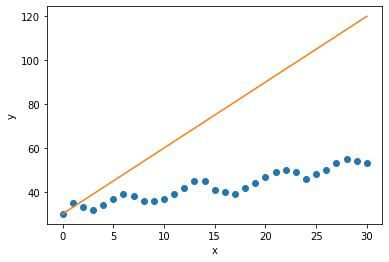

In [22]:
# define data
X = np.arange(0,31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
     40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# number of inputs
num_in = len(Y)

line = np.add(3 * X, 30)
plt.plot(X, Y,'o')
plt.plot(X, line)
plt.ylabel('y')
plt.xlabel('x')

This function $y = 3x + 30$ tries, but according to any reasonable perspective, fails to fit the data. Why is it so obvious that it fails? It has a lot to do with how close the y values expressed by the line model are to the actual data. Compare this with a model of decent fit to the data:

Text(0.5, 0, 'x')

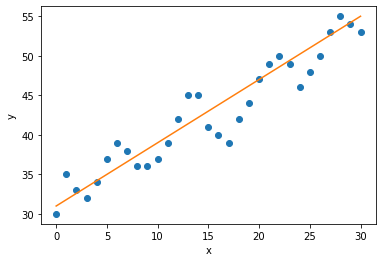

In [23]:
line_2 = np.add(0.80 * X, 31)

plt.plot(X, Y,'o')
plt.plot(X, line_2)
plt.ylabel('y')
plt.xlabel('x')


The $y$ values expressed by the fit $y = 0.8x + 31$ are much closer to that of the data, but exactly how should we quantify this closeness? The concept that we use to measure the accuracy of our fit is known as the **metric**. A metric can be any equation which relates the behavior of the model to the behavior of the data. Conveniently, statistics provides us with an equation which is useful for relating variant quantities (such as a model and its data), the standard deviation equation. Substituting in the error for the standard deviation, we can create an accurate metric for evaluating our models:

$$ E = \sqrt{\frac{1}{n} \sum_{k = 1}^n (F(x_k, \theta) - y_k)^2}$$

The result of this equation $E$ is equal to the total error between the model and the set of values $y_k$ which we chose to compare. It is not possible to construct a model which would produce the maximum error, as the amount of error can be infinite, and in any case, we are focused on finding a model that has minimum error in relation to the data. Visiting again on our high school calculus, one may recall that there is a function called the derivative, which returns the rate of change of an expression with respect to a variable. Wherever the rate of change is 0, the function is at a minimum or maximum. Our error function, when the model parameters are unknown, is purely a function of the parameters $\theta$ when all of the other data is know. So what happens if we take the partial derivatives $\frac{\delta E}{\delta\theta}$ and $\frac{\delta E}{\delta\theta}$. Wherever these values equal 0, there is a minimum, and wherever global minimum is, is the best fit for our model.

It is impractical for us to take the derivative of large models, and near impossible to solve a nonlinear set of equations proposed by the derivative of the error metric using traditional $Ax = b$ approaches. Therefore, in this assignment we use a lesser known approach for finding minima called the Nelder-Mead technique. We will not cover the technique in depth, but in short, the technique uses an n-dimensional triangle on the topology created by the error metric. Each vertex of the triangle is located at some coordinate of the parameters and the error $(E, \theta_{n},...,\theta_{n})$. By algorithmically moving the vertices of the triangle down or across the topology, we can eventually arrive at a good local minimum. 

In order to achieve good starting conditions for the Nelder-Mead method, we must also have a good idea of the range in which our desired minima sits, so a favorable approach might be to consider a reasonable range in which the parameters lie (this range is a function of the data), and then to simply generate random starting parameters within that range, and initiate the Nelder-Mead algorithm to isolate a minimum.

With the above theoretical framework, we can now begin to curve fit the data using other non-linear models.

## III. Algorithm Implementation and Development 

Consider the data from lecture on 3/31:

     X=np.arange(0,31)
     Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
     40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

Fit data to a least squares metric, and this model: $ f(x) = A\cos{Bx} + Cx + D$ 

### (i) Write a code to find the minimum error and determine the parameters A,B,C,D.

We now have the opportunity to implement our proposed model and error metric, as python functions which accept the data.

In [24]:
# proposed fit for data
# accepts input value as well as models parameters (floats)
def model_1(x, c):
    y = c[0] * np.cos(c[1] * x) + (c[2] * x) + c[3]
    return y

# defines the objective function for optimization
def error(c, x, y, num_in):
    e2 = np.sqrt((np.sum(model_1(x, c) - y) ** 2) / num_in)
    return e2


These methods can be called to calculate modeled $y$ values based on the sampled $x$ values, which we can then use in our `error` function. Now we must create an initial set of constants. Notice that the constants are represented by values within the `c0` array.

In [25]:
# set the initial guess for the parameters
c0 = np.array([4, np.pi/3.5, 0.6, 29])

This guess is based on the fact that our model has 4 parameters, the average height of the sinusoidal figure is around 4, the frequency of the figure is some function of $\pi$, and line underlying the figure seems to have a small slope and an intercept around 30. This sort of thinking is what one may need to do to begin guessing correct fits for models (but random trial and error is also possible). Now that we have a set of constants we can use it as an initial guess for the Nelder-Mead method, and plot the results.

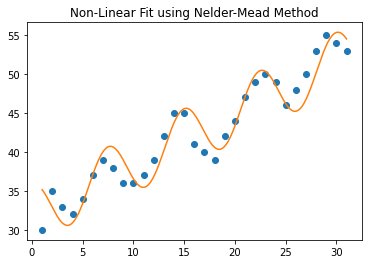

In [26]:
# perform optimization
res = opt.minimize(error, c0, args=(np.arange(1,num_in + 1), Y, num_in), method='Nelder-Mead')

# get the optimized parameters
c = res.x

# generate the data for plotting
tt = np.arange(1, num_in + 0.01, 0.01)
yfit = (c[0]*np.cos(c[1]*tt)+(c[2] * tt) + c[3])

# plot the raw data and the fitted curve
plt.plot(np.arange(1, num_in + 1), Y, 'o', label='data')
plt.plot(tt, yfit, label='fit')
plt.title('Non-Linear Fit using Nelder-Mead Method')
plt.show()


Not so bad right? These techniques really can be used to produce good fits, but it is necessary to combine trial and error with intelligent guesswork. The 